# Rigde Regression

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
x = pd.read_pickle("./pickles/x_sub.pkl").to_numpy()
y = pd.read_pickle("./pickles/y_sub.pkl").to_numpy()

In [24]:
def compute_mse(y, tx, w):
    """compute the loss by mse."""
    e = y - tx.dot(w) 
    return np.sum(e**2, axis=0)/(2*len(y))

In [36]:
def plot_train_test(errors, lambdas, degree):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(lambdas, errors, color='b', marker='*', label="Train error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("ridge_regression")

In [37]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    lambdaI = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    lhs = tx.T @ tx + lambdaI
    rhs = tx.T @ y
    return np.linalg.solve(lhs, rhs)

In [61]:
from scripts.proj1_helpers import build_poly

def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    #lambdas = np.logspace(-5, 0, 15)
    lambdas = [0.00001]

    # form train and test data with polynomial basis function
    tx = build_poly(x, degree)

    rmse = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression with a given lambda
        w = ridge_regression(y, tx, lambda_)
        
        rmse.append(np.sqrt(2 * compute_mse(y, tx, w)))
        
        print("proportion={p}, degree={d}, lambda={l}, RMSE={tr}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse, lambdas, degree)

proportion=0.5, degree=5, lambda=1e-05, RMSE=[0.75347032]


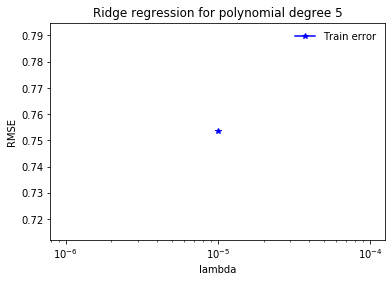

In [62]:
seed = 56
degree = 5
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)